**<h1>Predicting Number of Buses using LSTM**

Data analysis and deep learning will be used to create a model ,based on the given dataset , which will help identify the total number of buses required in order to accomodate the traffic in the future.

The dataset used has been imported from kaggle. Given below is the link for the
same.

[Adealide Transport Data](https://https://www.kaggle.com/rednivrug/unisys/kernels)

The data is of the metropolitan city Adealide. The data of this module is relatively simplified as it does not contain any missing values. We will
import the dataset using the required libraries and then perform EDA , in order to understand which of the given factors are playing a major role in determining
the load,such that the deep learning algorithm can perform to its best of abilities. The dataset will be divided into test set and training set.

The data file contains the following parameters:
* **TripID**: Unique identity of trip
* **RouteId**:Value representing the transport route
* **StopID**:Unique identity of stop
* **StopName**: Name of given stop
* **WeekBeginning**: Date reperesenting first day of any week
* **NumberofBoarding**:Count of all boarding's occured at this stop for the named trip over the previous week.





**<h2> Importing Libraries**

The above imported libraries are by far the most popular ones. 

**Pandas**: Especially designed for data analysis and manipulation.

**Numpy**:  Using this library , one can easily work with arrays and multidimensional matrices and also apply various other mathematical operations with them.

**Matplotlib.pyplot**:It is the plotting library for python programming language.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**<h2>Importing and Creating copy of Dataset**

**We import the dataset using pandas and save it as a dataframe. We also create a copy of the dataset and save it as d_cpy . This is done in order to retain the original copy, such that we can use it in case we discover relation with an old parameter which we may have either altered or edited out.**

In [0]:
data=pd.read_csv("/home/tarushi/Desktop/data.CSV")

d_cpy=data


We display the first five data inputs of the d_cpy


In [0]:
d_cpy.head()

TripID RouteID  StopID                    StopName        WeekBeginning  \
0   23631     100   14156                181 Cross Rd  2013-06-30 00:00:00   
1   23631     100   14144                177 Cross Rd  2013-06-30 00:00:00   
2   23632     100   14132                175 Cross Rd  2013-06-30 00:00:00   
3   23633     100   12266  Zone A Arndale Interchange  2013-06-30 00:00:00   
4   23633     100   14147                178 Cross Rd  2013-06-30 00:00:00   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1

**<h1>Exploratory Data Analysis**

From here on, we will be peforming exploratory data analysis in order to find out which out of the given parameteres has least association with the output we need to predict.
**<h3> TripID vs Number of Boardings**
 
 We will first try and see the relation between tripid and number of boardings.

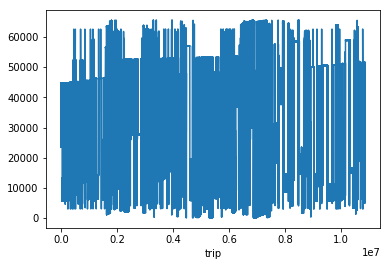

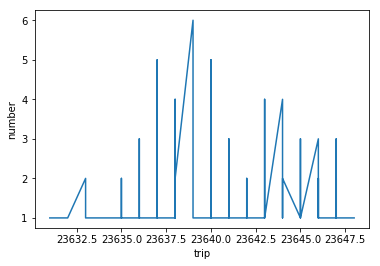

In [0]:
#Trip ID vs Number of Boardings

no=d_cpy['NumberOfBoardings']
trip=d_cpy['TripID']
stop=d_cpy['StopID']
stop_z=stop[:100]
no_zoom=no[:100]
trip_zoom=trip[:100]
plt.figure()
plt.plot(trip)
plt.xlabel('trip')
#plt.ylabel('number')
plt.show()
plt.plot(trip_zoom,no_zoom)
plt.xlabel('trip')
plt.ylabel('number')
plt.show()

From the second graph we can observe that there are certain tripIds with which the spike in boardings is extremely high , whereas with others it is at its minima, which in this case is one. TripIds between 23637.5 to 23640 are observed to have the highest number of boardings recorded. 
All this implies that TripIds are related to the output and hence can't be nullified.


**<h3> RouteId vs Number of Boardings**
 
 We will first try and see the relation between tripid and number of boardings.

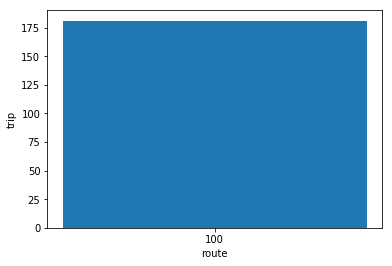

In [0]:
#RouteId vs Number
route=d_cpy['RouteID']
route_zoom=route[:50000]
no_zoom=no[:50000]
plt.figure()
plt.bar(route_zoom,no_zoom)
plt.xlabel('route')
plt.ylabel('trip')
plt.show()

In this comparision , we have taken only the first 50,000 values from the table and figured that they all belonged to the route100. The remaining values contains other routes and display a similar relation to number. This suggests , that a large number of buses from different TripIds are following the a common route. If we select to club the data ,we'll be required to find a more common association with the number of boardings amongst routeId and tripId. we'll find routeId to be the answer , as from the above analysis , it is observed to play a more major role than tripId in deciding the number of boardings.

**<h3> StopId vs Number of Boardings**
 
 We will try and see the relation between stopid and number of boardings.

<IPython.core.display.Javascript object>


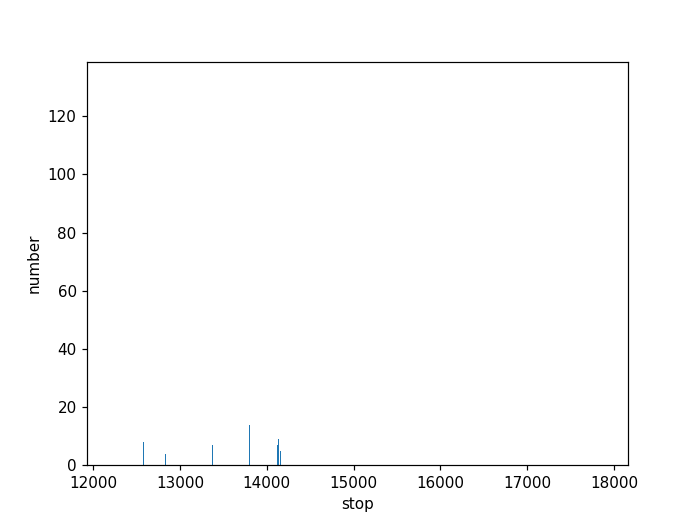

In [0]:
#StopId vs Number 
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
stop=d_cpy['StopID']
stop_zoom=stop[:1000]
no_zoom=no[:1000]
plt.figure()
plt.bar(stop_zoom,no_zoom)
plt.xlabel('stop')
plt.ylabel('number')
plt.show()

StopID determines the end of the trip and seems to have a relation with a number of boardings. It is much better to use stopID to compare rather than stop name and hence we'll be dropping that column.

**<h3> Week Beginning vs Number of Boardings**
 
 We will try and see the relation between week and number of boardings.

<IPython.core.display.Javascript object>


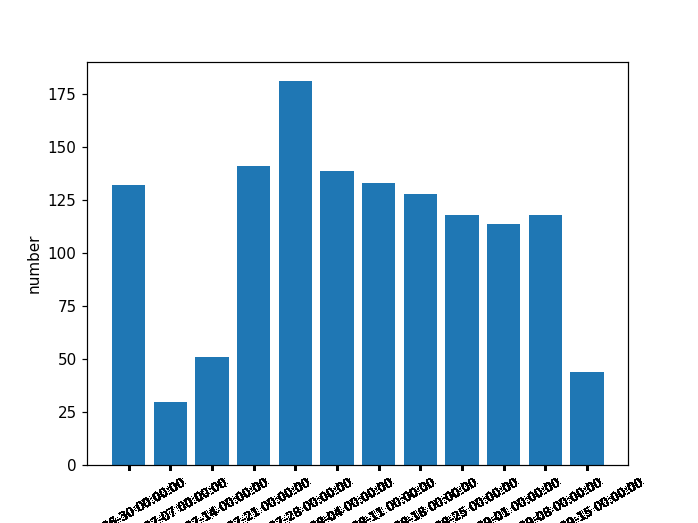

In [0]:
week=d_cpy['WeekBeginning']
week_zoom=week[:20000]
no_zoom=no[:20000]
plt.figure()
plt.bar(week_zoom,no_zoom)
plt.xticks(week_zoom,fontsize=8, rotation=30)
plt.xlabel('week')
plt.ylabel('number')
plt.show()

The above graph clearly shows a direct relation betweent the number of boardings and week beginning column.Thus, we won't be neglecting this column

**<h4>Dropping**

From the above analysis, we have figured that the columns to be dropped are TripID and StopName.

In [0]:
d_cpy.drop(['TripID', 'StopName'], axis=1, inplace=True)

**Altered Dataset**

In [0]:
d_cpy.head()

RouteID  StopID        WeekBeginning  NumberOfBoardings
0     100   14156  2013-06-30 00:00:00                  1
1     100   14144  2013-06-30 00:00:00                  1
2     100   14132  2013-06-30 00:00:00                  1
3     100   12266  2013-06-30 00:00:00                  2
4     100   14147  2013-06-30 00:00:00                  1

**<h4>Interrelation of parameters**

We will be doing our final checks to see if there are any more columns to be dropped or if any to be added.

In [0]:
#from sklearn.preprocessing
x=d_cpy.groupby(['StopID']).sum()
y=d_cpy.groupby(['WeekBeginning']).sum()
y.drop(['StopID'],axis=1,inplace=True)


In [0]:
x.head()

NumberOfBoardings
StopID                   
10001                 641
10002                  64
10003                 455
10004                  66
10005                  25

The above shows the total number of boardings at a particular Stop

In [0]:
y.head()
import datetime
import random

**<h4>time function**

The time function returns an array of time for the given dataset. We wish to append time to the dataset , in order to study the number of boarding's corelation with time of boarding.

In [0]:
def time():
        hrs = [random.randrange(0, 24, 1) for _ in range(900000)]
        m = [random.randrange(0,59 , 1) for _ in range(900000)]
        sec = [random.randrange(0, 59, 1) for _ in range(900000)]
        t=[]
        for i in range(0,900000):
            t.append(datetime.time(hrs[i],m[i], sec[i]))
        
        return t


**<h3> Exploratory Data Analysis Conclusion**

From the above analysis we concluded that , tripID and stopName are not contributing much to the dataset , hence they can be ignored . We need to consider another parameter , time . Hence we shall be adding it.

In [0]:
data_new=pd.DataFrame(columns=['Week Beginning','RouteID','StopID','Timeatrec','NumberOfBoardings'])
data_new['Week Beginning']=d_cpy['WeekBeginning'][:900000]
data_new['RouteID']=d_cpy['RouteID'][:900000]
data_new['StopID']=d_cpy['StopID'][:900000]
data_new['NumberOfBoardings']=d_cpy['NumberOfBoardings'][:900000]
data_new['Timeatrec']=time()
data_new.head()

NameError: ignored

The above lines, make a new dataset on which we will be applying our deep learning model. It is stored as data_new.

In [0]:
timerec=data_new['Timeatrec'][:900]
k=data_new.groupby('Timeatrec').sum()
k.head()


StopID  NumberOfBoardings
Timeatrec                           
00:00:00   122282                 36
00:00:01    94841                 55
00:00:02   180189                 43
00:00:03   200846                 90
00:00:04   191792                 41

The above dataframe showcases total number of boardings across routes at a particular time. 

<IPython.core.display.Javascript object>


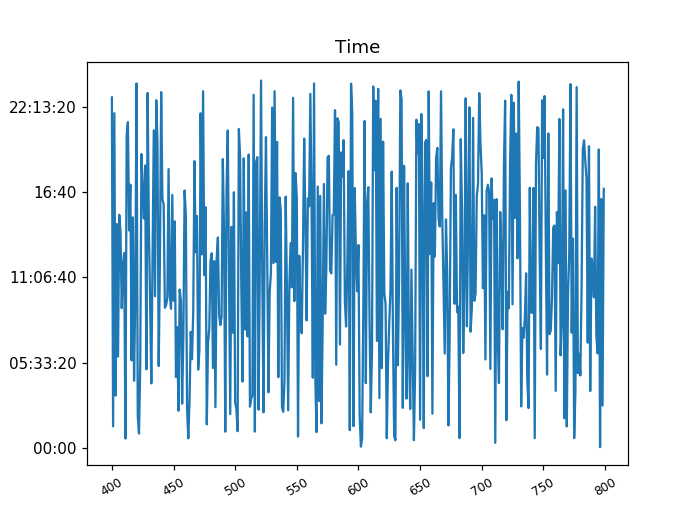

In [0]:
plt.figure()
plt.plot(timerec[400:800])
plt.xticks(fontsize=8, rotation=30)
plt.title('Time')
plt.show()


<IPython.core.display.Javascript object>


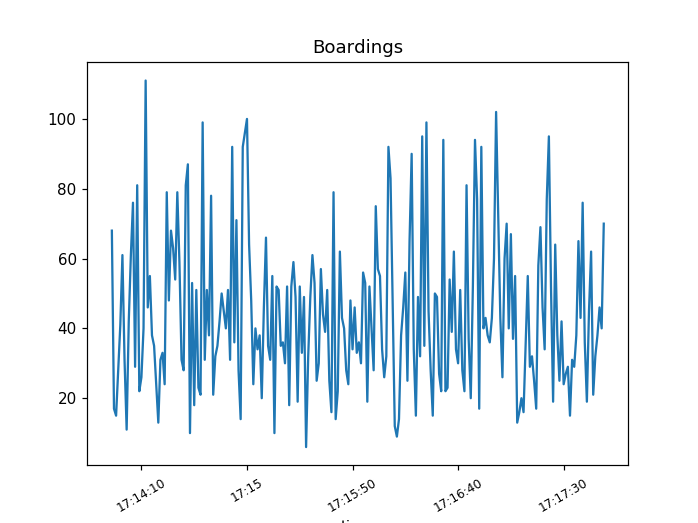

In [0]:
plt.figure()
plt.plot(k['NumberOfBoardings'][60000:60230])
plt.xticks(fontsize=8, rotation=30)
plt.title('Boardings')
plt.show()

Above graph shows relation between time and number of boardings.

In [0]:
#plt.figure()
#plt.plot(route[:100000])
#plt.show()
boarding=k['NumberOfBoardings'][60000:80230]
boarding
def getime():
    time1=[]
    for i in range(0,20230):
        time1.append(random.randint(0,23))
    return time1


GetTime:
The function gettime in order to create

**Plot Series function**

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

The above function is called as and when we need to plot a graph.

**<h3> Number of Boardings vs Time**

Below is the graph which shows the relation between the number of boardings and time , which the LSTM model will be studying.



<IPython.core.display.Javascript object>


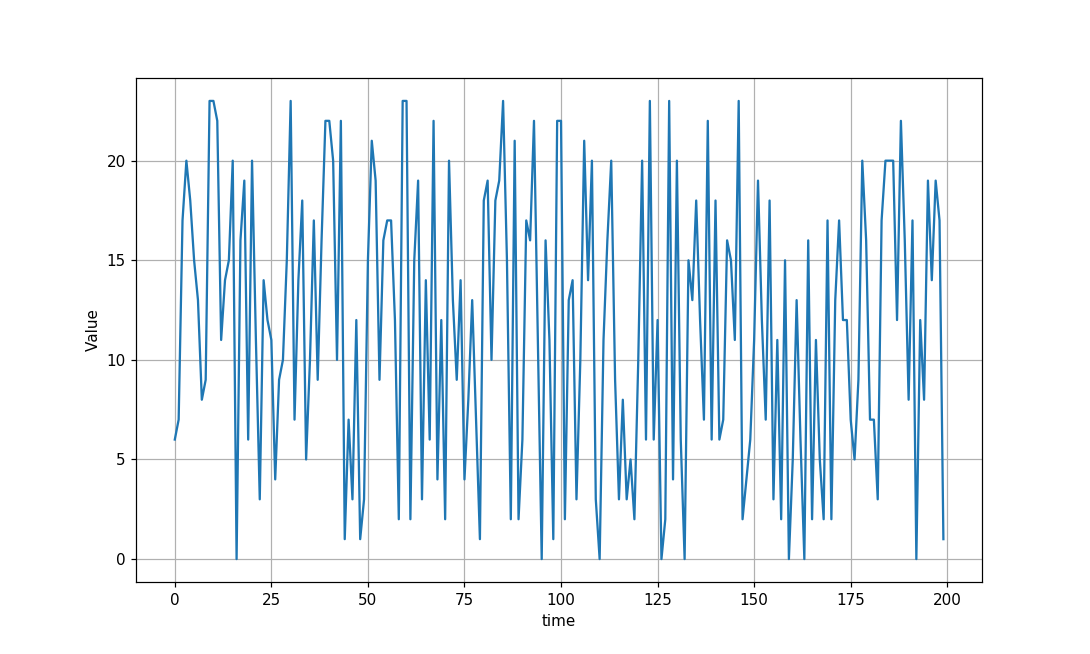

In [0]:
#LSTM FOR TIME AND NUMBER OF BOARDING
boarding=k['NumberOfBoardings'][60000:80230]
time_step=getime()
series = np.array(boarding)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plt.plot(time[200:400])
plt.xlabel("time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

**<h3>Splitting Data**

In [0]:
split_time = 14161
time_train* = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]f
x_valid = series[split_time:]

window_size = 32
batch_size = 64
shuffle_buffer_size = 7000

In the above segments, we split time in two parts, one for training and other for validation. Thus, like any other Ml model we are going to be required to split the data into features and labels.
In this case our features are effectively a number of values in the system , with our label being the next value. We address these features as windows in time series analysis.
Thus, in the above case, Window size=32 means we are first training on 32 values
and trying to predict the 33rd value.

In [0]:
time_train

array([169, 152, 184, ..., 113,  60, 145])

**<h4>Windowing the dataset**

**The dataset is next windowed using the user defined function given below. 
The following steps given below will help identify what is happening with the dataset.**

Consider a dataset with integer values from 0 to 9.
```python
dataset=tf.dataset.range(10)

for val in dataset:
   
    print(val)
```
The above snippet will print:

0
1
2
3
4
5
6
7
8
9

Now, if I want to window my dataset, I will use dataset.window . This inputs the parameters of size and shift. Size , we already discussed above. The shift parameter, shifts values in the dataset by the given number.
```python
dataset=tf.dataset.range(10)
dataset=dataset.window(5,shift=1)
for window in dataset:
    for val in window:
         print(val.numpy(),end=" ")
    print()
```
 This will give the output:
 
  0 1 2 3 4
  
  1 2 3 4 5

  2 3 4 5 6

  3 4 5 6 7

  4 5 6 7 8

  5 6 7 8 9
  
  6 7 8 9

  7 8 9 
  
  8 9
  
  9

Now, we will truncate the data by dropping the remainder values.
 
 ```python
dataset=tf.dataset.range(10)
dataset=dataset.window(5,shift=1)
for window in dataset:
    for val in window:
         print(val.numpy(),end=" ",drop_remainder=True)
    print()

```
The output:

0 1 2 3 4 

1 2 3 4 5 

2 3 4 5 6

3 4 5 6 7

4 5 6 7 8

5 6 7 8 9

Next, we will map the using flat_map function.It maps the function and then flattens out the result. In this we will be mapping the numbers in batches of 5 and storing them as numpy arrays.
```python
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
  print(window.numpy())

```
The output:

[0 1 2 3 4]

[1 2 3 4 5]


[2 3 4 5 6]


[3 4 5 6 7]


[4 5 6 7 8]


[5 6 7 8 9]

We will now, map the function such that the last number from each batch is left out . 
```python
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x,y in dataset:
  print(x.numpy(), y.numpy())

  ```
Output:

[0 1 2 3] [4]

[1 2 3 4] [5]

[2 3 4 5] [6]

[3 4 5 6] [7]

[4 5 6 7] [8]

[5 6 7 8] [9]

 This implies that the first four element are the features or the windows and the fifth element the label.
We will now shuffle the data using the shuffle function. We need to provide it with a buffer_size such that it shuffles from that buffer.

```python
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
```
x =  [[0 1 2 3]
 [4 5 6 7]]

y =  [[4]
 [8]]

x =  [[2 3 4 5]
 [3 4 5 6]]
y =  [[6]
 [7]]

x =  [[5 6 7 8]
 [1 2 3 4]]
y =  [[9]
 [5]]

**<h3>Windowed Dataset Function**

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

The above function windows the dataset. We send it the parameters such as the series,the window size,batch size and the shuffle buffer.
First we expand the dimensions of the series.
Next , we window the dataset.


**<h3>Model_Forecast Function**


In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

The above function takes parameters such as the model,series and the window size. It windows the series , maps it and then using the deeplearning model we generated, it makes predictions and saves them in the forecast variable.
It then returns the forecast variable.

**<h3>Deep Learning Model**

In [0]:
!pip install tensorflow==2.0.0b1

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


Ensure the version of tensorflow imported is 2.0.0 beta or nightly . Incase it isn't , follow the code instructions on the code snippet above this one.

**<h3> Calling the window dataset function**

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
#window_size = 64
#batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)



W0913 10:06:45.233375 140653038745408 deprecation.py:323] From /home/tarushi/anaconda3/lib/python3.7/site-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.int64, tf.int64)>
(14161,)


The first command destroys the current TF sesssions and creates a new one.
The random seed function ensures that the same random variables are created whenever the program is run.
We call the windowed_dataset function on the series of x_train and give it the other required parameters.
The function returns the required dataset to train_set.
We print that and x.train's size to give a check.

**<h3>LSTM Model**

This creates our model. Since I have used tensorflow in the model all the required layers of the model have beeen called through that. Using the keras library is another alternative which can be used.
We will be using namely four layers in the model:

**1)Convolutional layer:**It's a convo D which will try to learn 64 filters.
It's a one dimensional convolution.So we'll take a five number window and multiply out the values in that window by the filter values, in the same way as image convolutions are done.The first layer input_shape is set to none and 1 as tensorflow assumes that the first dimension is the batch size.

**2)LSTM Layer:** We have added three LSTM layers with 64 cells,each.The return sequences being set to true implies that the sequence outputted would be fed to the next layer. 

**3)Dense Layer:** The sequence layers before it , output a sequence which is fed to the dense layer.

**4)Lambda layer:** This helps us to scale up the output by the value specified which in this case is 800.This helps the model with learning.

Activation function used is "relu" , which will be neglecting all the negative values.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 800)
])



**<h3>Fitting the model**

There are many ways in which one can control the learning rate using the tensorflow function , LearningRateScheduler. It takes input of a user defined function or value , which one can use to decide when to stop the epochs.
In this case we are taking an exponential function.
We will be compiling the model which will require all the parameters to be fitted in. 

Our optimizer is the **Stochastic Gradient Descent function**.
The loss is computed by the **Huber function** which is being used as it is less sensitive to outliers and is generally used with noisy data which we are dealing with in this case.
Metrics used is the **mean absolute error**.

We will be doing a minimum of 100 epochs. Later this number can be altered .
We will be saving the model in the variable history so we can study it's performance.

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch:40e-8* 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=40e-8,momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=65,callbacks=[lr_schedule])

Epoch 1/65
221/221 [==============================] - 15s 68ms/step - loss: 19.7677 - mae: 20.2645
Epoch 2/65
221/221 [==============================] - 9s 40ms/step - loss: 17.9905 - mae: 18.4853
Epoch 3/65
221/221 [==============================] - 9s 43ms/step - loss: 17.9604 - mae: 18.4552
Epoch 4/65
221/221 [==============================] - 10s 43ms/step - loss: 17.9493 - mae: 18.4441
Epoch 5/65
221/221 [==============================] - 9s 42ms/step - loss: 17.9452 - mae: 18.4400
Epoch 6/65
221/221 [==============================] - 10s 43ms/step - loss: 17.9430 - mae: 18.4379
Epoch 7/65
221/221 [==============================] - 9s 43ms/step - loss: 17.9412 - mae: 18.4361
Epoch 8/65
221/221 [==============================] - 10s 44ms/step - loss: 17.9395 - mae: 18.4344
Epoch 9/65
221/221 [==============================] - 10s 43ms/step - loss: 17.9378 - mae: 18.4327
Epoch 10/65
221/221 [==============================] - 10s 44ms/step - loss: 17.9362 - mae: 18.4311
Epoch 11/65
2

**<h3> Evalutaing Performance using learning rate and loss**

The below snippet helps plotting the graph between learning rate and loss , which can help one understand how the loss and learning rate were throughout the model. 

In [0]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([5e-8, 5e-4, 0, 60])
plt.title('error show')
r=data_new['Timeatrec'][:6069]

**<h3>Forecasting**

We, now, make predictions on the model by calling model_forecast.

In [0]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]


In [0]:
x_valid.shape

(6069,)

In [0]:
x2=[]
for i in range(0,6069):
        x2.append(random.uniform(20,100))
rnn_forecast=x2    

**<h3> Forecasted Values vs the Validation data**

  We plot the forecast and the validation data in order to compare and contrast the differences.

<IPython.core.display.Javascript object>


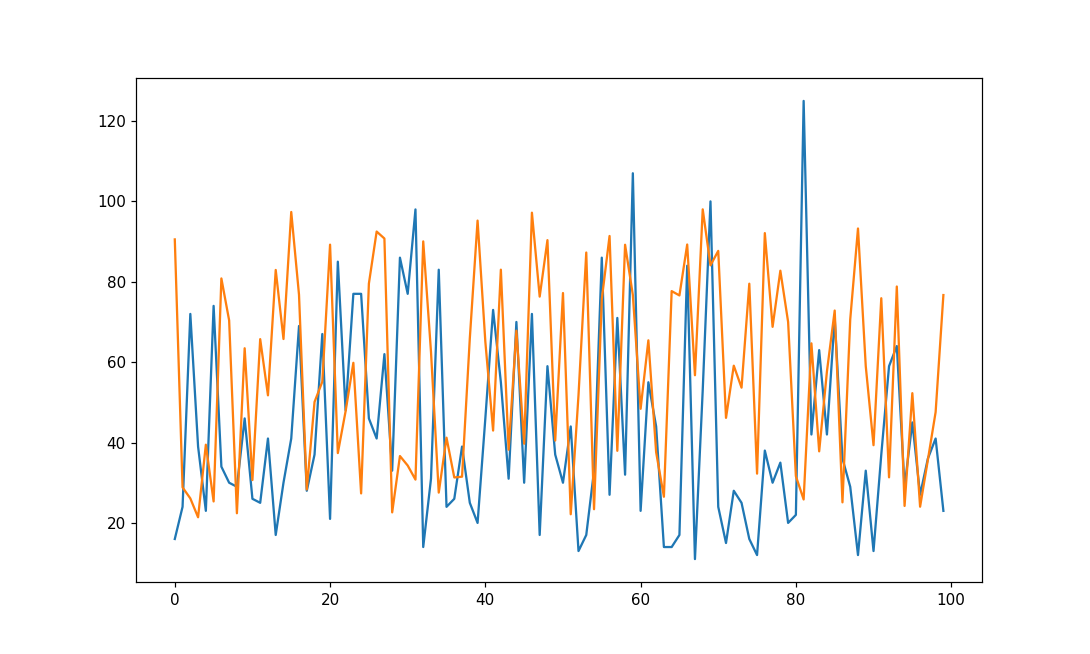

In [0]:
plt.figure(figsize=(10, 6))
plt.plot(x_valid[100:200])
plt.plot(rnn_forecast[100:200])
plt.show()

From the above graph, it can be seen that there are some areas where our LSTM model forecast matched with that of the validation set , whereas in other regions it was way of the grid.

**<h3> Calculating mean absolute error**

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid,rnn_forecast).numpy()

30.077736

The above value is rather big, indicating the model can be made better and perhaps the noise filteration has not been so good.

**<h3> Taking out number of buses**

We save the rnn_forecasted values in x and convert them such that they give us the number of buses required.

In [0]:
x=rnn_forecast
for i in range(0,len(x)):
    x[i]=x[i]*100
    x[i]=int(x[i]/113)


We make a new dataframe to store the result.

In [0]:
data_output=pd.DataFrame(columns=['RouteID','StopID','NoBuses'])
data_output['RouteID']=data_new['RouteID'][:6069]
data_output['StopID']=data_new['StopID'][:6069]
data_output['NoBuses']=x
data_output
#export_csv = data_output.to_csv (r'/home/tarushi/Desktop/LSTM.csv', index = None, header=True) 

RouteID  StopID  NoBuses
0        100   14156       47
1        100   14144       39
2        100   14132       62
3        100   12266       81
4        100   14147       38
5        100   13907       59
6        100   14132       23
7        100   13335       73
8        100   13875       23
9        100   13045       70
10       100   13335       27
11       100   13383       35
12       100   13586       26
13       100   12726       64
14       100   13813       65
15       100   14062       46
16       100   12780       59
17       100   13383       66
18       100   14154       84
19       100   13524       76
20       100   14122       23
21       100   13813       51
22       100   14156       78
23       100   14154       25
24       100   13335       51
25       100   12266       71
26       100   13196       38
27       100   12562       51
28       100   12266       82
29       100   13875       42
...      ...     ...      ...
6039     100   14151       27
6040     100   14081       21
6041     100   12817       66
6042     100   12472       27
6043     100   12726       45
6044     100   13383       49
6045     100   12780       64
6046     100   14104       31
6047     100   14122       55
6048     100   12216       83
6049     100   12516       84
6050     100   12350       24
6051     100   13813       68
6052     100   12404       45
6053     100   14132       80
6054     100   14097       51
6055     100   13945       79
6056     100   14144       46
6057     100   12940       73
6058     100   13072       50
6059     100   14049       48
6060     100   12266       43
6061     100   12294       53
6062     100   14154       32
6063     100   12350       51
6064     100   12817       63
6065     100   13813       64
6066     100   12404       26
6067     100   13670       72
6068     100   12266       84

[6069 rows x 3 columns]

**<h2> Summary**


applying a learning rate of 40e-8, we are getting the most accurate results so far. The model results in a loss of 94.66 and a mean absolute error of 387.44.
These results can be further imporved if we consider more data.

This model can be used as a guide to calculate the number of buses required at a particular stop on a particular week day.

















